In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 10,6

In [15]:
df = pd.read_csv('D:/MSC Data Analytics/Statistical Machine Learning/Assignments/Assignment4/covid-19_zip/data/key-countries-pivoted_csv.csv')

In [20]:
x = df.drop(['US', 'United_Kingdom', 'Italy', 'France', 'Germany', 'Spain', 'Iran'], axis = 1)

In [23]:
x['Date'] = pd.to_datetime(x['Date'], infer_datetime_format = True)
indexedDataset = x.set_index(['Date'])

In [24]:
from datetime import datetime
indexedDataset.head()

,China
Date,
2020-01-22,548
2020-01-23,643
2020-01-24,920
2020-01-25,1406
2020-01-26,2075


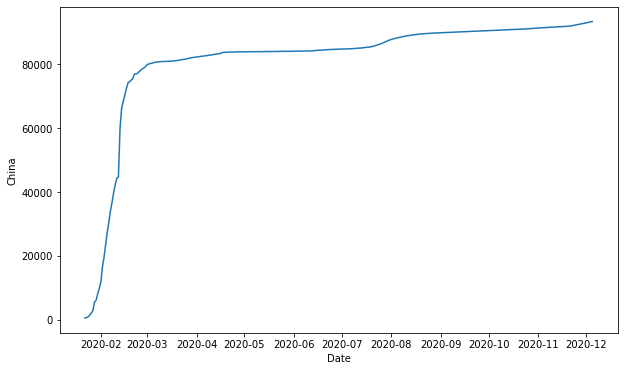

In [25]:
plt.xlabel('Date')
plt.ylabel('China')
plt.plot(indexedDataset)

In [28]:
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print(rolmean, rolstd)

                   China
Date                    
2020-01-22           NaN
2020-01-23           NaN
2020-01-24           NaN
2020-01-25           NaN
2020-01-26           NaN
...                  ...
2020-12-01  92458.583333
2020-12-02  92553.250000
2020-12-03  92651.916667
2020-12-04  92754.583333
2020-12-05  92859.250000

[319 rows x 1 columns]                  China
Date                  
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
...                ...
2020-12-01  342.857102
2020-12-02  354.434024
2020-12-03  362.367583
2020-12-04  371.147228
2020-12-05  380.889658

[319 rows x 1 columns]


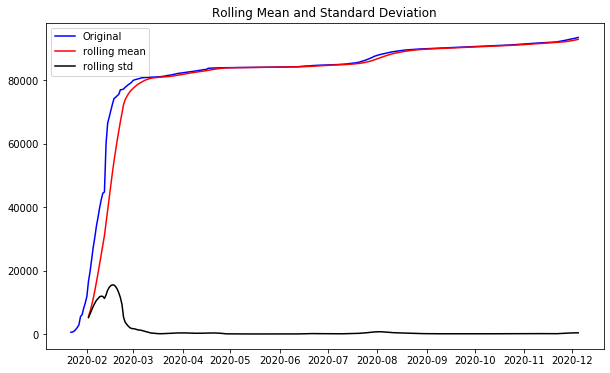

In [29]:
# plot rolling statistics
orig = plt.plot(indexedDataset, color='blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'rolling mean')
std = plt.plot(rolstd, color = 'black', label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block = False)


In [32]:
# perform dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('results of dickey fuller test:')
dftest = adfuller(indexedDataset['China'], autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)' %key] = value
    
print(dfoutput)

results of dickey fuller test:
Test Statistic                -5.691456e+00
p-value                        8.053325e-07
#Lags used                     1.500000e+01
Number of observations used    3.030000e+02
Critical value (1%)           -3.452118e+00
Critical value (5%)           -2.871127e+00
Critical value (10%)          -2.571878e+00
dtype: float64


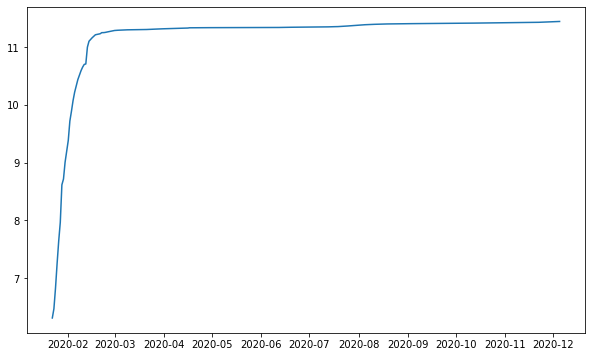

In [33]:
indexedDataset_logscale = np.log(indexedDataset)
plt.plot(indexedDataset_logscale)

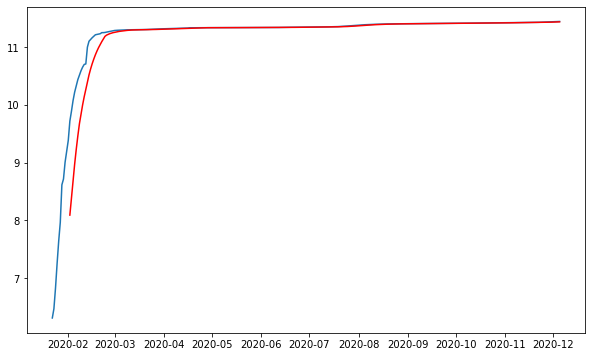

In [34]:
movingAverage = indexedDataset_logscale.rolling(window=12).mean()
movingStd = indexedDataset_logscale.rolling(window=12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color = 'red')

In [35]:
lsmv = indexedDataset_logscale - movingAverage
indexedDataset_logscale.head()

,China
Date,
2020-01-22,6.306275
2020-01-23,6.466145
2020-01-24,6.824374
2020-01-25,7.248504
2020-01-26,7.637716


In [40]:
lsmv.isnull()

,China
Date,
2020-01-22,True
2020-01-23,True
2020-01-24,True
2020-01-25,True
2020-01-26,True
...,...
2020-12-01,False
2020-12-02,False
2020-12-03,False


In [42]:
lsmv.dropna(inplace = True)
lsmv.head()

,China
Date,
2020-02-02,1.629540
2020-02-03,1.501187
2020-02-04,1.384912
2020-02-05,1.248194
2020-02-06,1.100115


In [43]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingStd = timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    org = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling Mean')
    std = plt.plot(movingStd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey-Fuller Test
    print('Result of dickey-fuller test')
    dftest = adfuller(timeseries['China'], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)' %key] = value
    print(dfoutput)

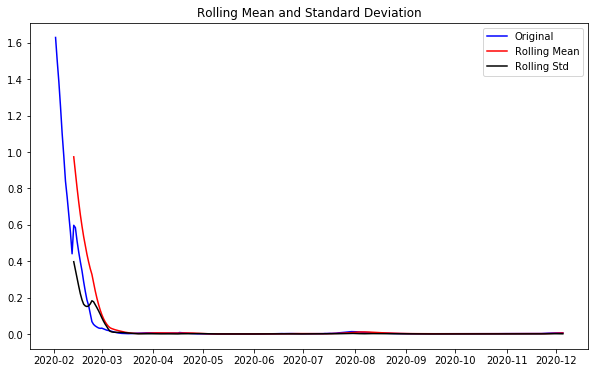

Result of dickey-fuller test
Test Statistic                -7.065656e+00
p-value                        5.088753e-10
#Lags used                     1.600000e+01
Number of observations used    2.910000e+02
Critical value (1%)           -3.453023e+00
Critical value (5%)           -2.871524e+00
Critical value (10%)          -2.572090e+00
dtype: float64


In [44]:
test_stationarity(lsmv)

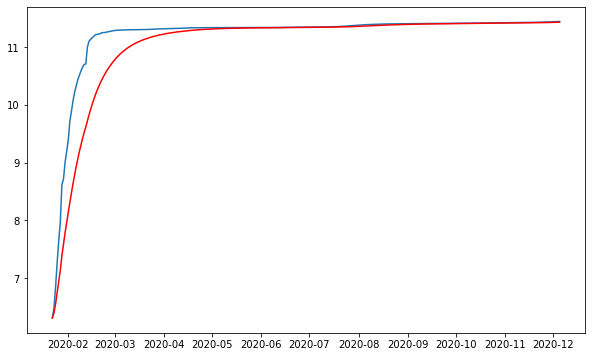

In [45]:
edwa = indexedDataset_logscale.ewm(halflife = 12, min_periods=0, adjust = True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(edwa, color = 'red')

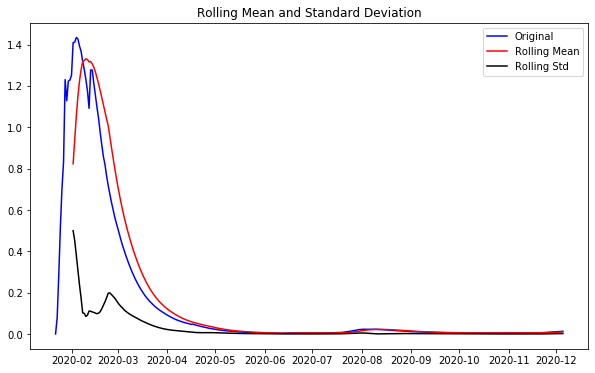

Result of dickey-fuller test
Test Statistic                -1.107829e+01
p-value                        4.376049e-20
#Lags used                     1.600000e+01
Number of observations used    3.020000e+02
Critical value (1%)           -3.452190e+00
Critical value (5%)           -2.871158e+00
Critical value (10%)          -2.571895e+00
dtype: float64


In [46]:
dme = indexedDataset_logscale - edwa
test_stationarity(dme)

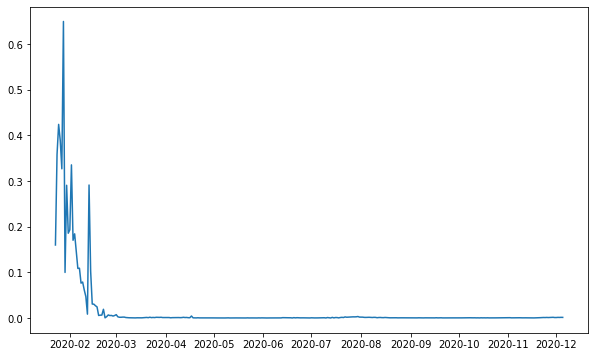

In [47]:
dls = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(dls)

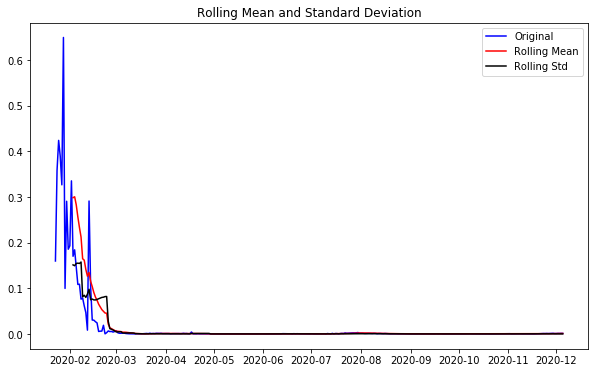

Result of dickey-fuller test
Test Statistic                -9.811460e+00
p-value                        5.642428e-17
#Lags used                     1.700000e+01
Number of observations used    3.000000e+02
Critical value (1%)           -3.452337e+00
Critical value (5%)           -2.871223e+00
Critical value (10%)          -2.571929e+00
dtype: float64


In [48]:
dls.dropna(inplace = True)
test_stationarity(dls)

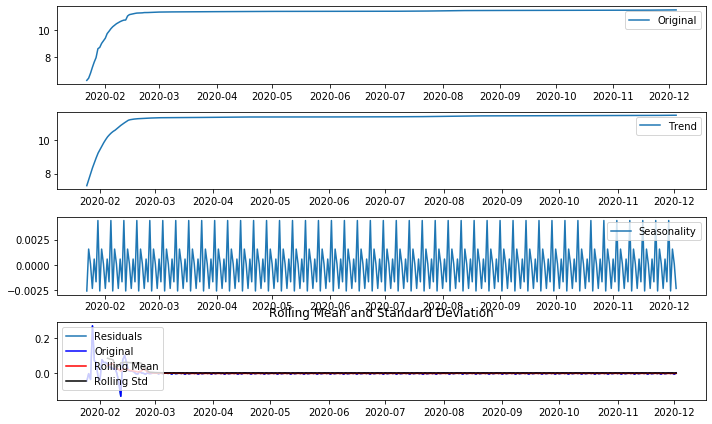

Result of dickey-fuller test


KeyError: 'China'

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

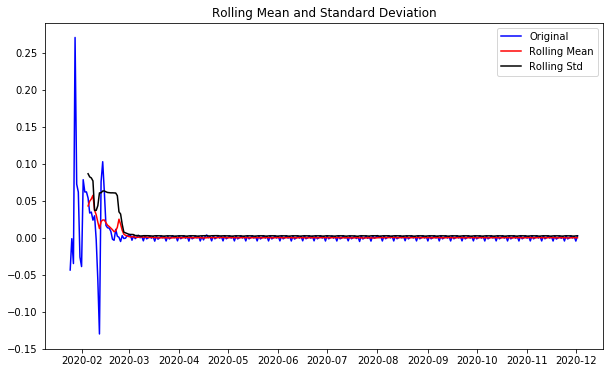

Result of dickey-fuller test


KeyError: 'China'

In [50]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
test_stationarity(decomposedLogData)

C:\Users\alaga\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


Text(0.5, 1.0, 'Partial Autocorrelation function')

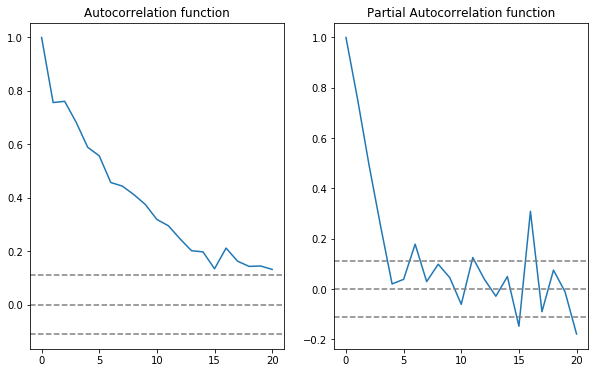

In [55]:
# ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dls, nlags = 20)
lag_pacf = pacf(dls, nlags = 20, method = 'ols')

# plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(dls)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(dls)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation function')
            
#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color = 'gray')
plt.axhline(y=-1.96/np.sqrt(len(dls)), linestyle = '--', color = 'gray')
plt.axhline(y=1.96/np.sqrt(len(dls)), linestyle = '--', color = 'gray')
plt.title('Partial Autocorrelation function')

C:\Users\alaga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\alaga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


plotting AR Model


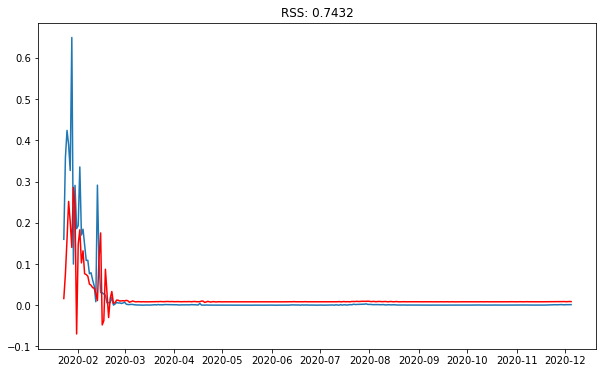

In [60]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logscale, order=(0,1,2))
results_AR = model.fit(disp=1)
plt.plot(dls)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum ((results_AR.fittedvalues-dls["China"])**2))
print('plotting AR Model')

C:\Users\alaga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\alaga\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


plotting AR Model


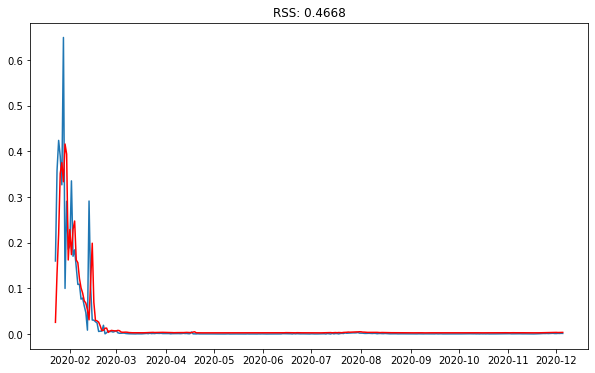

In [61]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(indexedDataset_logscale, order=(2,1,0))
results_AR = model.fit(disp=1)
plt.plot(dls)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f' % sum ((results_AR.fittedvalues-dls["China"])**2))
print('plotting AR Model')

In [62]:
arima_pred = pd.Series(results_AR.fittedvalues, copy = True)
print(arima_pred.head())

Date
2020-01-23    0.025473
2020-01-24    0.132881
2020-01-25    0.219405
2020-01-26    0.351824
2020-01-27    0.375267
dtype: float64


In [63]:
cum = arima_pred.cumsum()
print(cum)

Date
2020-01-23    0.025473
2020-01-24    0.158354
2020-01-25    0.377759
2020-01-26    0.729583
2020-01-27    1.104850
                ...   
2020-12-01    5.488826
2020-12-02    5.492014
2020-12-03    5.495331
2020-12-04    5.498771
2020-12-05    5.502214
Length: 318, dtype: float64


In [67]:
log = pd.Series(indexedDataset_logscale['China'].iloc[0], index = indexedDataset_logscale.index)
log = log.add(cum, fill_value = 0)
log.head()

Date
2020-01-22    6.306275
2020-01-23    6.331748
2020-01-24    6.464629
2020-01-25    6.684035
2020-01-26    7.035858
dtype: float64

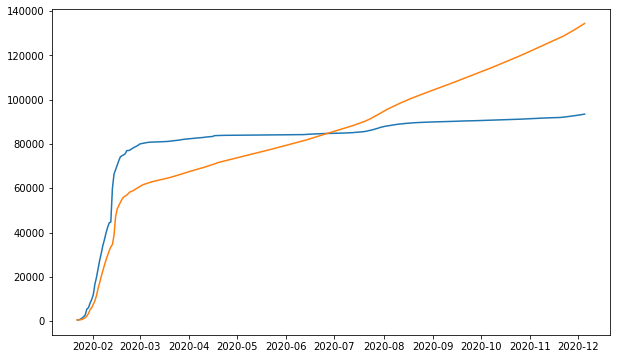

In [68]:
arima_pred = np.exp(log)
plt.plot(indexedDataset)
plt.plot(arima_pred)

In [69]:
indexedDataset_logscale

,China
Date,
2020-01-22,6.306275
2020-01-23,6.466145
2020-01-24,6.824374
2020-01-25,7.248504
2020-01-26,7.637716
...,...
2020-12-01,11.440280
2020-12-02,11.441569
2020-12-03,11.442728


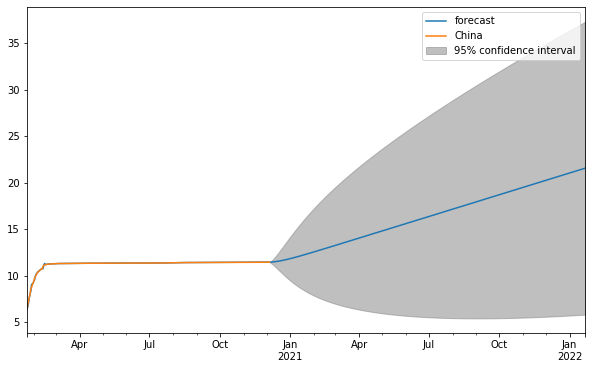

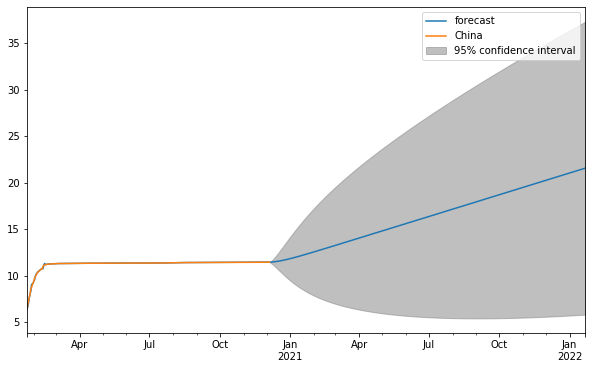

In [76]:
results_AR.plot_predict(1, 730)
#x = results_ARIMA.forecast(steps = 81)

In [77]:
results_AR.forecast(steps = 730)

(array([11.4488849 , 11.45317108, 11.45896408, 11.46572088, 11.47365112,
        11.4825334 , 11.49240238, 11.50314941, 11.51475416, 11.5271498 ,
        11.54030104, 11.55415852, 11.56868506, 11.58384021, 11.59958899,
        11.61589659, 11.63273126, 11.65006249, 11.66786185, 11.68610235,
        11.70475867, 11.72380688, 11.74322446, 11.76299016, 11.78308399,
        11.80348706, 11.82418159, 11.84515084, 11.86637901, 11.8878512 ,
        11.90955339, 11.93147236, 11.95359564, 11.97591149, 11.99840883,
        12.02107722, 12.04390684, 12.06688842, 12.09001321, 12.11327298,
        12.13665998, 12.16016688, 12.1837868 , 12.20751323, 12.23134005,
        12.2552615 , 12.27927212, 12.3033668 , 12.32754069, 12.35178925,
        12.37610818, 12.40049344, 12.42494121, 12.4494479 , 12.47401012,
        12.49862468, 12.52328856, 12.54799894, 12.57275314, 12.59754864,
        12.62238306, 12.64725417, 12.67215986, 12.69709814, 12.72206714,
        12.74706509, 12.77209032, 12.79714127, 12.8